In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the Excel file
input_file = "datasets/Carbon_(CO2)_Emissions_by_Country.xlsx"
output_file = "formatted_file.csv"

# Read the Excel file
df = pd.read_excel(input_file)
print(df)

# Save it as a CSV
df.to_csv(output_file, index=False)
print(f"File successfully converted to {output_file}")

          Country  Region       Date  Kilotons of Co2  Metric Tons Per Capita
0     Afghanistan    Asia 1990-01-01           2380.0                    0.22
1     Afghanistan    Asia 1991-01-01           2230.0                    0.21
2     Afghanistan    Asia 1992-01-01           1390.0                    0.12
3     Afghanistan    Asia 1993-01-01           1340.0                    0.10
4     Afghanistan    Asia 1994-01-01           1290.0                    0.08
...           ...     ...        ...              ...                     ...
5672     Zimbabwe  Africa 2015-01-01          12430.0                    0.88
5673     Zimbabwe  Africa 2016-01-01          11020.0                    0.76
5674     Zimbabwe  Africa 2017-01-01          10340.0                    0.70
5675     Zimbabwe  Africa 2018-01-01          12380.0                    0.82
5676     Zimbabwe  Africa 2019-01-01          11760.0                    0.77

[5677 rows x 5 columns]
File successfully converted to formatte

In [3]:
""" 
What is the range of years or time period covered in the data?
"""
from datetime import datetime as dt

df['Date'] = df['Date'].dt.strftime('%Y')   # Formatting the 'Date' column

start_year = df["Date"].min()
end_year = df["Date"].max()
print(f"The dataset covers the time period from {start_year} to {end_year}")

The dataset covers the time period from 1990 to 2019


In [5]:
""" 
Code focues on the "Asia" region, 
sorts countries within it by CO2 emissions in descending order, and extracts the top emitters.

This is useful for identifying the most significant contributors to CO2 emissions within a particular region.
"""
# Analyze top 5 countries within the largest-emitting region
top_countries = df[df["Region"] == "Asia"].sort_values(by="Kilotons of Co2", ascending=False)
print(top_countries.head())


with open("top_countries.csv", "w", encoding='utf-8') as top_country:
    top_country.write(top_countries.head().to_string(index=False, header=True))

# Save it as a CSV
top_country_container = "./top_countries.csv"


     Country Region  Date  Kilotons of Co2  Metric Tons Per Capita
1079   China   Asia  2019      10707219.73                    7.61
1078   China   Asia  2018      10502929.69                    7.49
1077   China   Asia  2017      10096009.77                    7.23
1074   China   Asia  2014      10006669.92                    7.29
1073   China   Asia  2013       9984570.31                    7.32


    Year  Kilotons of Co2
0   1990      20341800.00
1   1991      20482540.00
2   1992      20513040.00
3   1993      20651120.00
4   1994      20765250.00
5   1995      21356750.00
6   1996      21807640.00
7   1997      22183020.00
8   1998      22303000.00
9   1999      22406130.00
10  2000      23123390.00
11  2001      23518340.00
12  2002      23833349.80
13  2003      24939900.31
14  2004      26073289.89
15  2005      27039670.03
16  2006      27916500.20
17  2007      28968049.92
18  2008      29191159.84
19  2009      28867640.01
20  2010      30619529.64
21  2011      31584239.82
22  2012      32015620.18
23  2013      32665170.52
24  2014      32742940.00
25  2015      32541869.55
26  2016      32564800.27
27  2017      33053139.82
28  2018      33817899.77
29  2019      33871179.99


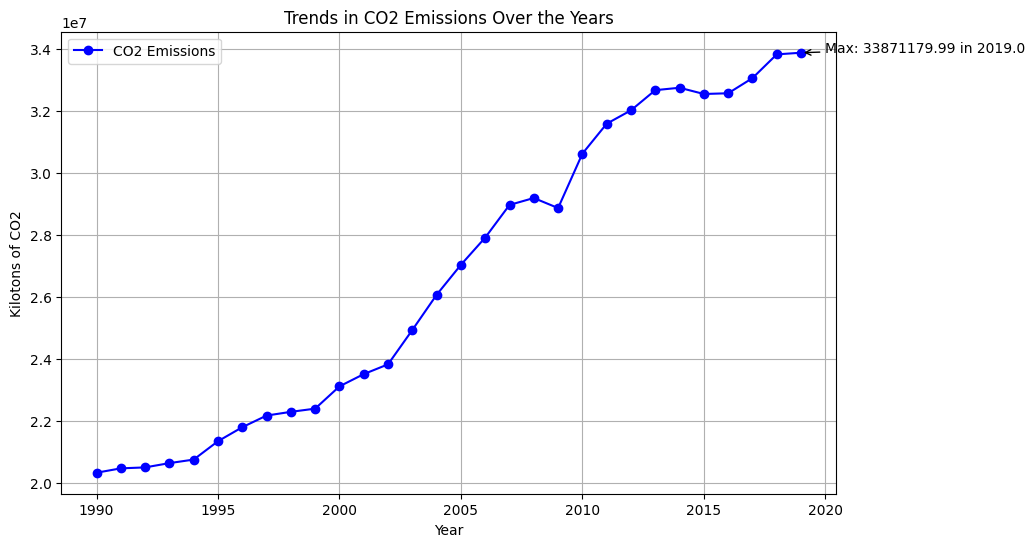

In [6]:
"""
1) What are the trends in CO2 emissions over the years?
"""

dataset_3 = pd.read_csv("formatted_file.csv")
dataset_3['Date'] = pd.to_datetime(dataset_3['Date'])
dataset_3["Year"] = dataset_3["Date"].dt.year
yearly_emissions = dataset_3.groupby('Year')["Kilotons of Co2"].sum().reset_index()
print(yearly_emissions)


# Visualize Trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_emissions["Year"], yearly_emissions["Kilotons of Co2"], marker="o", color="b", label="CO2 Emissions")
plt.title("Trends in CO2 Emissions Over the Years")
plt.xlabel("Year")
plt.ylabel("Kilotons of CO2")


# Find the year with the maximum CO2 emissions
max_year = yearly_emissions.loc[yearly_emissions["Kilotons of Co2"].idxmax()]

# Annotate the maximum point
plt.annotate(f"Max: {max_year['Kilotons of Co2']} in {max_year['Year']}",
             xy=(max_year["Year"], max_year["Kilotons of Co2"]),
             xytext=(max_year["Year"] + 1, max_year["Kilotons of Co2"] + 500),
             arrowprops=dict(facecolor='red', arrowstyle='->'))



# Add grid and legend
plt.grid(True)
plt.legend()
plt.show()


         Country  Kilotons of Co2   Formatted Co2
8          China     1.807228e+08  180,722,829.26
11         India     3.988273e+07   39,882,729.97
16         Japan     3.507659e+07   35,076,589.73
35   South Korea     1.440727e+07   14,407,269.99
13          Iran     1.294063e+07   12,940,629.92
12     Indonesia     1.053713e+07   10,537,130.02
33  Saudi Arabia     1.041192e+07   10,411,920.04
41        Turkey     7.654740e+06    7,654,740.00
39      Thailand     5.962840e+06    5,962,840.00
18    Kazakhstan     5.781750e+06    5,781,750.03
float64


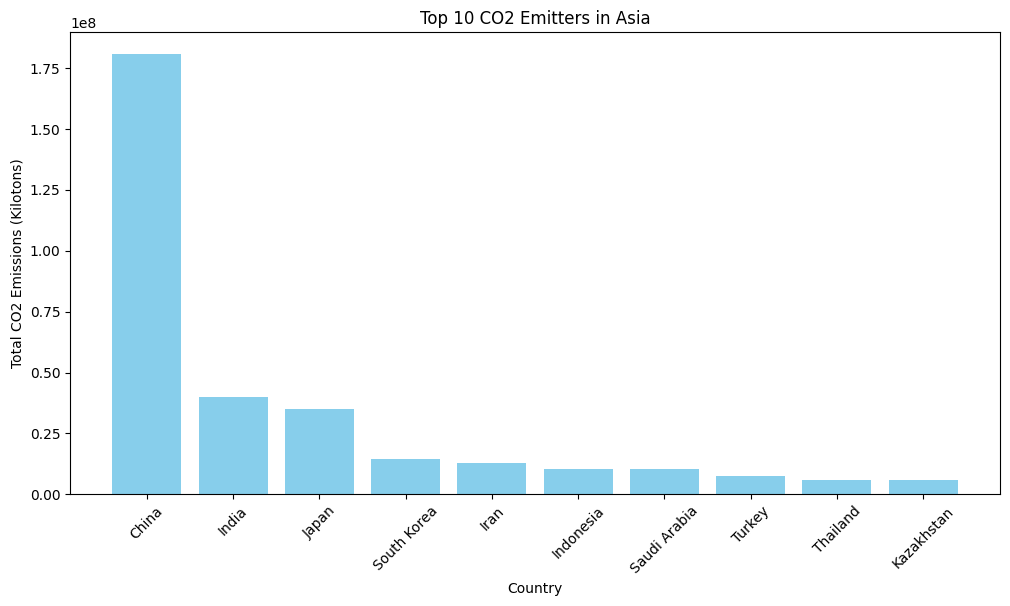

In [9]:
""" 
2) Which country in Asia has the highest CO2 emissions over time?

"""
# Filter the dataset for the Asia region
asia_data = df[df["Region"] == "Asia"]

# Group by country and calculate the total CO2 emissions
asia_emissions = asia_data.groupby("Country")["Kilotons of Co2"].sum().reset_index()

# Sort the countries by total CO2 emissions in descending order
asia_emissions = asia_emissions.sort_values(by="Kilotons of Co2", ascending=False)


"""
Create a new column for the formatted strings while keeping the original column numeric:

'Kilotons of Co2' remains numeric for further calculations.

'Formatted Co2' is used only for displaying.

"""
# Create a formatted display column
asia_emissions["Formatted Co2"] = asia_emissions["Kilotons of Co2"].map('{:,.2f}'.format)

# Display the (DataFrame) - the top emitters
print(asia_emissions[["Country", "Kilotons of Co2", "Formatted Co2"]].head(10))

# Check the type and contents of the Kilotons of Co2 column:
print(asia_emissions["Kilotons of Co2"].dtype)

with open("top_emissions_in_asia.txt", "w", encoding='utf-8') as emission_asia_file:
    emission_asia_file.write(asia_emissions[["Country", "Kilotons of Co2", "Formatted Co2"]].head(10).to_string(index=False, header=True))
    emission_asia_file.close()


# Visualize the Top (10) Emittiers  - Using Matplotlib
top_emitters = asia_emissions.head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_emitters["Country"], top_emitters["Kilotons of Co2"], color="skyblue")
plt.title("Top 10 CO2 Emitters in Asia")
plt.xlabel("Country")
plt.ylabel("Total CO2 Emissions (Kilotons)")
plt.xticks(rotation=45)
plt.show()


         Country  Kilotons of Co2 Formatted Co2_Africa
44  South Africa      10590620.03        10,590,620.03
13         Egypt       4778139.99         4,778,139.99
0        Algeria       3119609.99         3,119,609.99
36       Nigeria       2851100.00         2,851,100.00
26         Libya       1412920.00         1,412,920.00
32       Morocco       1292710.00         1,292,710.00
49       Tunisia        688230.00           688,230.00
1         Angola        553170.00           553,170.00
52      Zimbabwe        381210.00           381,210.00
46         Sudan        332710.00           332,710.00


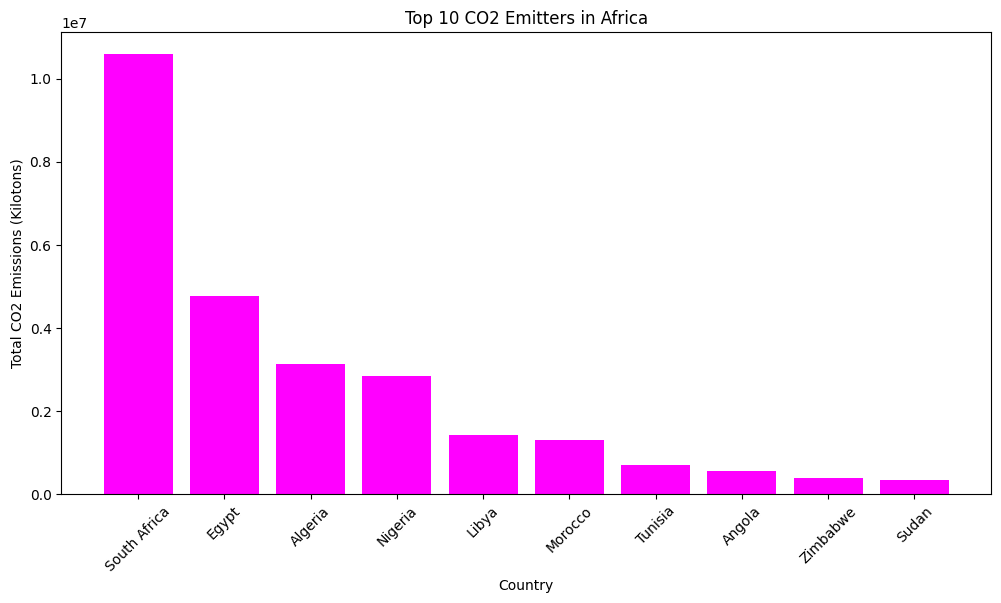

          Country  Kilotons of Co2 Formatted Co2_Americas
32  United States     1.583179e+08         158,317,880.68
7          Canada     1.543650e+07          15,436,500.05
22         Mexico     1.206116e+07          12,061,159.96
6          Brazil     1.028535e+07          10,285,349.96
1       Argentina     4.374320e+06           4,374,320.04
34      Venezuela     4.126760e+06           4,126,760.02
9        Colombia     1.904850e+06           1,904,850.00
8           Chile     1.781930e+06           1,781,930.00
26           Peru     1.082420e+06           1,082,420.00
14        Ecuador     8.684500e+05             868,450.00


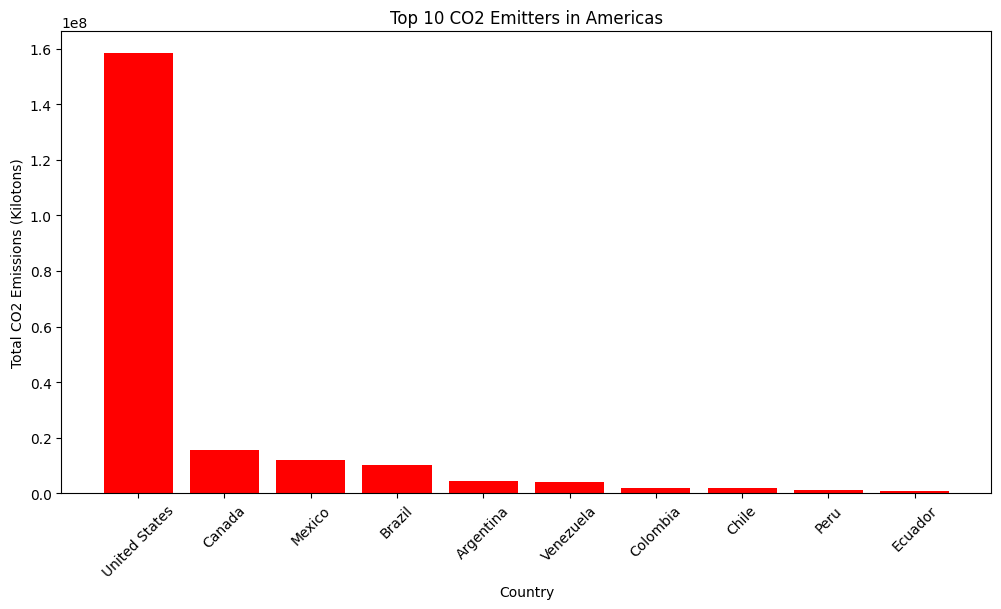

             Country  Kilotons of Co2 Formatted Co2_Oceania
0          Australia      10421949.99         10,421,949.99
6        New Zealand        896770.00            896,770.00
8   Papua New Guinea        129340.00            129,340.00
1               Fiji         31850.00             31,850.00
10   Solomon Islands          8430.00              8,430.00
7              Palau          6160.00              6,160.00
9              Samoa          5420.00              5,420.00
4         Micronesia          3870.00              3,870.00
3   Marshall Islands          3570.00              3,570.00
11             Tonga          3460.00              3,460.00


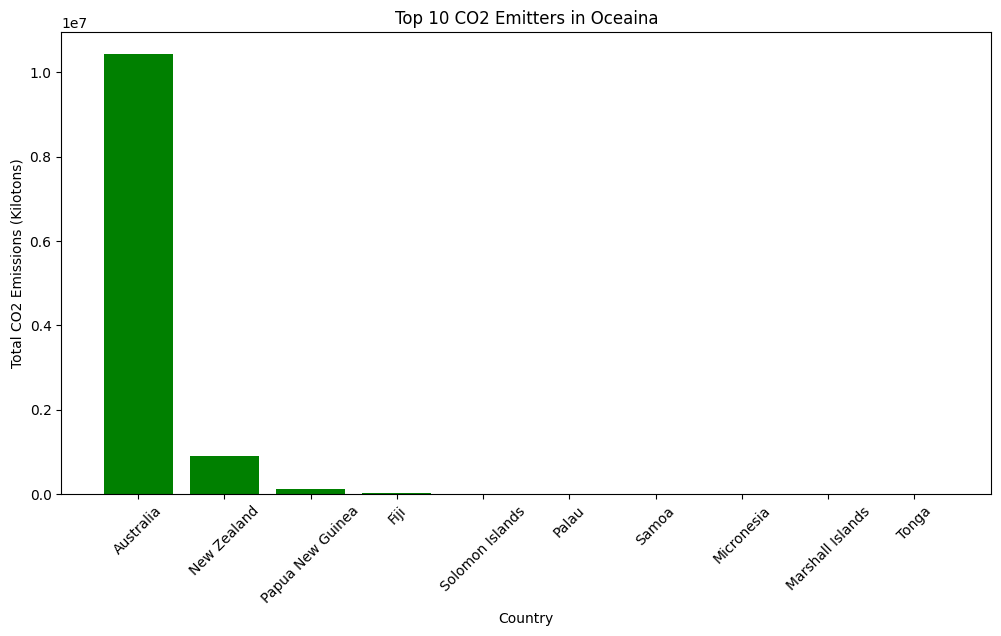

           Country  Kilotons of Co2 Formatted Co2_Europe
32          Russia      50028669.96        50,028,669.96
13         Germany      24367020.03        24,367,020.03
40  United Kingdom      14824210.01        14,824,210.01
18           Italy      12092299.95        12,092,299.95
12          France      10543269.97        10,543,269.97
39         Ukraine       9787780.03         9,787,780.03
29          Poland       9427510.01         9,427,510.01
36           Spain       8148009.98         8,148,009.98
26     Netherlands       4828429.96         4,828,429.96
8   Czech Republic       3514870.00         3,514,870.00


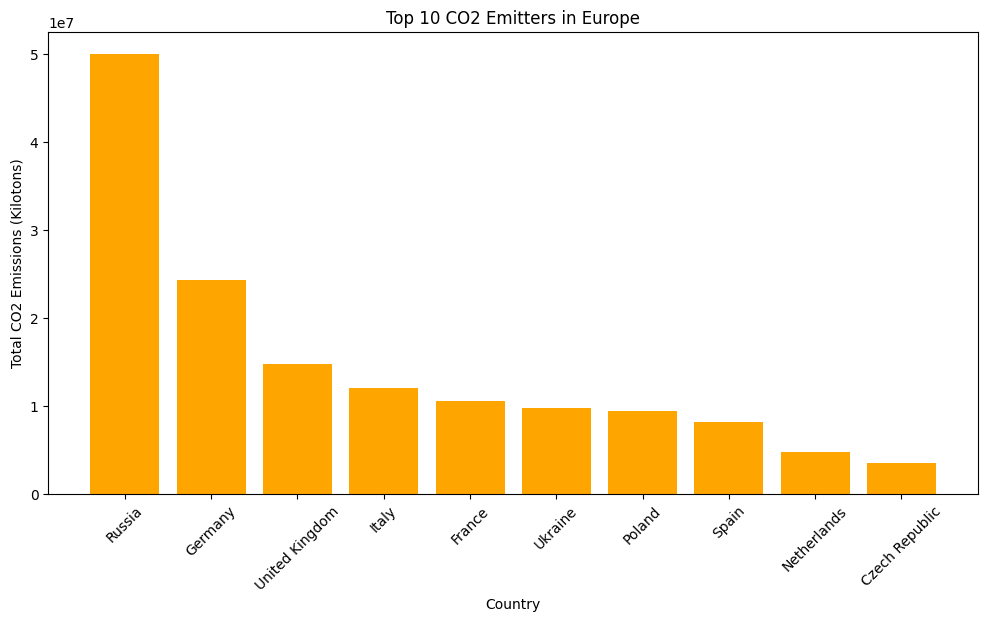

In [10]:
africa_data = df[df["Region"] == "Africa"]
americas_data = df[df["Region"] == "Americas"]
oceania_data = df[df["Region"] == "Oceania"]
europe_data = df[df["Region"] == "Europe"]


while True:
    # if africa_data:
    africa_emissions = africa_data.groupby("Country")["Kilotons of Co2"].sum().reset_index()

    africa_emissions = africa_emissions.sort_values(by="Kilotons of Co2", ascending=False)

    africa_emissions["Formatted Co2_Africa"] = africa_emissions["Kilotons of Co2"].map('{:,.2f}'.format)

    print(africa_emissions[["Country", "Kilotons of Co2", "Formatted Co2_Africa"]].head(10))

    with open("top_emissions_in_africa.txt", "w", encoding='utf-8') as emission_africa_file:
        emission_africa_file.write(africa_emissions[["Country", "Kilotons of Co2", "Formatted Co2_Africa"]].head(10).to_string(index=False, header=True))
        emission_africa_file.close()

    top_emitters_africa = africa_emissions.head(10)

    plt.figure(figsize=(12, 6))
    plt.bar(top_emitters_africa["Country"], top_emitters_africa["Kilotons of Co2"], color="magenta")
    plt.title("Top 10 CO2 Emitters in Africa")
    plt.xlabel("Country")
    plt.ylabel("Total CO2 Emissions (Kilotons)")
    plt.xticks(rotation=45)
    plt.show()


# elif americas_data:
    americas_emissions = americas_data.groupby("Country")["Kilotons of Co2"].sum().reset_index()

    americas_emissions = americas_emissions.sort_values(by="Kilotons of Co2", ascending=False)

    americas_emissions["Formatted Co2_Americas"] = americas_emissions["Kilotons of Co2"].map('{:,.2f}'.format)

    print(americas_emissions[["Country", "Kilotons of Co2", "Formatted Co2_Americas"]].head(10))

    with open("top_emissions_in_americas.txt", "w", encoding='utf-8') as emission_americas_file:
        emission_americas_file.write(americas_emissions[["Country", "Kilotons of Co2", "Formatted Co2_Americas"]].head(10).to_string(index=False, header=True))
        emission_americas_file.close()

    top_emitters_americas = americas_emissions.head(10)

    plt.figure(figsize=(12, 6))
    plt.bar(top_emitters_americas["Country"], top_emitters_americas["Kilotons of Co2"], color="red")
    plt.title("Top 10 CO2 Emitters in Americas")
    plt.xlabel("Country")
    plt.ylabel("Total CO2 Emissions (Kilotons)")
    plt.xticks(rotation=45)
    plt.show()


# elif oceania_data:
    oceania_emissions = oceania_data.groupby("Country")["Kilotons of Co2"].sum().reset_index()

    oceania_emissions = oceania_emissions.sort_values(by="Kilotons of Co2", ascending=False)

    oceania_emissions["Formatted Co2_Oceania"] = oceania_emissions["Kilotons of Co2"].map('{:,.2f}'.format)

    print(oceania_emissions[["Country", "Kilotons of Co2", "Formatted Co2_Oceania"]].head(10))

    with open("top_emissions_in_oceania.txt", "w", encoding='utf-8') as emission_oceania_file:
        emission_oceania_file.write(oceania_emissions[["Country", "Kilotons of Co2", "Formatted Co2_Oceania"]].head(10).to_string(index=False, header=True))
        emission_oceania_file.close()

    top_emitters_oceania = oceania_emissions.head(10)

    plt.figure(figsize=(12, 6))
    plt.bar(top_emitters_oceania["Country"], top_emitters_oceania["Kilotons of Co2"], color="green")
    plt.title("Top 10 CO2 Emitters in Oceaina")
    plt.xlabel("Country")
    plt.ylabel("Total CO2 Emissions (Kilotons)")
    plt.xticks(rotation=45)
    plt.show()


# elif europe_data:
    europe_emissions = europe_data.groupby("Country")["Kilotons of Co2"].sum().reset_index()

    europe_emissions = europe_emissions.sort_values(by="Kilotons of Co2", ascending=False)

    europe_emissions["Formatted Co2_Europe"] = europe_emissions["Kilotons of Co2"].map('{:,.2f}'.format)

    print(europe_emissions[["Country", "Kilotons of Co2", "Formatted Co2_Europe"]].head(10))

    top_emitters_europe = europe_emissions.head(10)

    with open("top_emissions_in_europe.txt", "w", encoding='utf-8') as emission_europe_file:
        emission_europe_file.write(europe_emissions[["Country", "Kilotons of Co2", "Formatted Co2_Europe"]].head(10).to_string(index=False, header=True))
        emission_europe_file.close()


    plt.figure(figsize=(12, 6))
    plt.bar(top_emitters_europe["Country"], top_emitters_europe["Kilotons of Co2"], color="orange")
    plt.title("Top 10 CO2 Emitters in Europe")
    plt.xlabel("Country")
    plt.ylabel("Total CO2 Emissions (Kilotons)")
    plt.xticks(rotation=45)
    plt.show()

    break

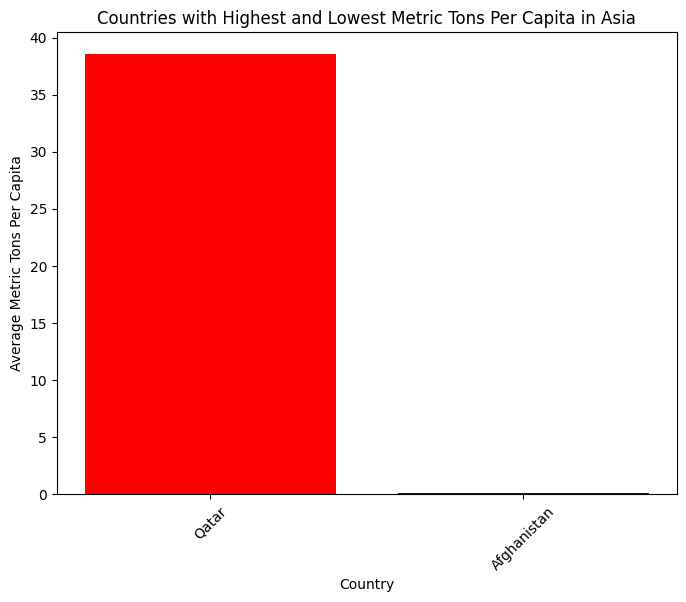

In [11]:
"""
3) Which countries in Asia have the highest and lowest Metric Tons Per Capita?

"""
# Calculate the average Metric Tons Per Capita by country
avg_metric_tons = asia_data.groupby("Country")["Metric Tons Per Capita"].mean()

# Find the highest and lowest emitters
highest_emitter = avg_metric_tons.idxmax()   # Country with highest
lowest_emitter = avg_metric_tons.idxmin()   # Country with lowest

# Create a DataFrame for visualization
comparison_data = avg_metric_tons[[highest_emitter, lowest_emitter]].reset_index()
comparison_data.columns = ["Country", "Average Metric Tons Per Capita"]

# Bar Chart Visualization
plt.figure(figsize=(8, 6))
plt.bar(comparison_data["Country"], comparison_data["Average Metric Tons Per Capita"], color=["red", "blue"])
plt.title("Countries with Highest and Lowest Metric Tons Per Capita in Asia")
plt.ylabel("Average Metric Tons Per Capita")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

with open("metric_tones_by_asia.txt", "w", encoding='utf-8') as asia_file:
    asia_file.write(f"Highest Metric Tons Per Capita in Asia: {highest_emitter} ({avg_metric_tons[highest_emitter]:.2f})\n")
    asia_file.write(f"Lowest Metric Tons Per Capita in Asia: {lowest_emitter} ({avg_metric_tons[lowest_emitter]:.2f})")
    asia_file.close()
